In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Processing

In [128]:
#read BFM2016 file
df = pd.read_excel(r'C:\Users\NuclearSnail\Documents\BFM2016.xlsx')

In [129]:
df_2000 = pd.read_excel(r'C:\Users\NuclearSnail\Documents\2000sample.xlsx')

In [130]:
df_2000

,wesbite,text_links,tags_counts,Internal_links,External_links,total_links,Failed
0,www.dickbosas.infosivut.fi,12,573,5,134,139,0
1,www.salumificiofranceschini.it,87,844,12,103,115,0
2,www.eramet-comilog.com,66,502,110,6,116,0
3,centraled.fr/index.php,34,535,24,34,58,0
4,www.archi5.fr,7,94,15,1,16,0
...,...,...,...,...,...,...,...
1796,www.max-holder.com,38,180,52,0,52,1
1797,www.cimasen.com,21,141,6,1,7,1
1798,www.evrasia-kzn.ru,11,175,25,2,27,1
1799,spektr-ru.com,19,218,27,6,33,1


In [131]:
df_2000 = df_2000.rename(columns={'wesbite': 'website'})

In [132]:
df_2000.loc[df_2000['website'] == 'partner-travel.com']

,website,text_links,tags_counts,Internal_links,External_links,total_links,Failed
1800,partner-travel.com,48,605,116,17,133,1


In [133]:
df_2000.loc[df_2000['website'] == '10-travel-agency.business.site']

,website,text_links,tags_counts,Internal_links,External_links,total_links,Failed
1203,10-travel-agency.business.site,10,146,3,7,10,1


In [134]:
df

,Unnamed: 0,bvdID,company_name,website,country_iso,size,legal_form,closing_date,turnover,profit_before_tax,net_income,current_ratio,profit_margin,solvency_ratio,nr_employees,roe,failed
0,0,FI08441054,AB DICK BOSAS OY,www.dickbosas.infosivut.fi,FI,Medium sized company,Private limited company - OY,28/02/2017,1654.0,145.0,116.0,0.69,8.77,26.08,8.0,24.91,0
1,1,CN9361042994,"BEIJING MODERN KAIYUANKEMAO CO.,LTD",www.aigobj.com,CN,Medium sized company,Limited liability company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,FI22050615,RAIKASTAMO OY,www.raikastamo.fi,FI,Medium sized company,Private limited company - OY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,NL27174773,DE NOTENBEURS B.V.,www.notenbeurs.nl,NL,Large company,Private limited liability company - BV,31/12/2016,NaN,1346.0,1008.0,2.91,NaN,52.05,21.0,39.37,0
4,4,IT03638780373,SALUMIFICIO FRANCESCHINI S.R.L.,www.salumificiofranceschini.it,IT,Medium sized company,Limited liability company - SRL,31/12/2016,2791.0,51.0,27.0,1.30,1.84,36.83,8.0,10.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768925,768925,FR532572112,IMAGE 7,www.image7.fr,FR,Large company,"Limited company, simplified - SAS",31/12/2016,21105.0,4953.0,3304.0,1.07,23.47,57.36,NaN,30.39,0
768926,768926,BG126746549,INTERTRADE EOOD,www.intertrade.bg,BG,Medium sized company,One-person private limited company - EOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
768927,768927,FR343751947,SEXTANT,www.sextant-monetique.fr/fr,FR,Medium sized company,Limited liability company - SARL,31/12/2016,1724.0,114.0,97.0,0.58,6.60,45.74,NaN,23.41,0
768928,768928,FR333430205,GAUDISMONTS,www.coursesu.com/f-superu-saintjeandemonts-inf...,FR,Large company,"Limited company, simplified - SAS",31/01/2017,47619.0,73.0,129.0,1.57,0.15,36.69,161.0,1.55,0


In [135]:
merged_df = df_2000.merge(df, on='website')
merged_df

,website,text_links,tags_counts,Internal_links,External_links,total_links,Failed,Unnamed: 0,bvdID,company_name,...,closing_date,turnover,profit_before_tax,net_income,current_ratio,profit_margin,solvency_ratio,nr_employees,roe,failed
0,www.dickbosas.infosivut.fi,12,573,5,134,139,0,0,FI08441054,AB DICK BOSAS OY,...,28/02/2017,1654.0,145.0,116.0,0.69,8.77,26.08,8.0,24.91,0
1,www.dickbosas.infosivut.fi,12,573,5,134,139,0,577645,FI08441054,AB DICK BOSAS OY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,www.salumificiofranceschini.it,87,844,12,103,115,0,4,IT03638780373,SALUMIFICIO FRANCESCHINI S.R.L.,...,31/12/2016,2791.0,51.0,27.0,1.30,1.84,36.83,8.0,10.29,0
3,www.eramet-comilog.com,66,502,110,6,116,0,7,FR592017750,COMILOG INTERNATIONAL,...,31/12/2016,6382.0,314.0,71.0,3.18,4.91,72.72,1.0,3.92,0
4,www.eramet-comilog.com,66,502,110,6,116,0,727587,FR592017750,COMILOG INTERNATIONAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,partner-travel.com,48,605,116,17,133,1,214696,RU00629815,PARTNER,...,31/12/2016,817.0,12.0,9.0,1.08,1.43,7.59,9.0,131.92,0
2994,partner-travel.com,48,605,116,17,133,1,388360,RU31983597N,PARTNER,...,31/12/2016,75.0,2.0,0.0,18.00,2.31,77.78,2.0,396.43,1
2995,partner-travel.com,48,605,116,17,133,1,414137,RU52571157N,PARTNER,...,31/12/2016,8344.0,-5.0,5.0,1.00,-0.06,0.57,2.0,-49.07,1
2996,partner-travel.com,48,605,116,17,133,1,552452,RU50847463,PARTNER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [136]:
merged_df = merged_df.drop_duplicates(subset=['website'])
merged_df

,website,text_links,tags_counts,Internal_links,External_links,total_links,Failed,Unnamed: 0,bvdID,company_name,...,closing_date,turnover,profit_before_tax,net_income,current_ratio,profit_margin,solvency_ratio,nr_employees,roe,failed
0,www.dickbosas.infosivut.fi,12,573,5,134,139,0,0,FI08441054,AB DICK BOSAS OY,...,28/02/2017,1654.0,145.0,116.0,0.69,8.77,26.08,8.0,24.91,0
2,www.salumificiofranceschini.it,87,844,12,103,115,0,4,IT03638780373,SALUMIFICIO FRANCESCHINI S.R.L.,...,31/12/2016,2791.0,51.0,27.0,1.30,1.84,36.83,8.0,10.29,0
3,www.eramet-comilog.com,66,502,110,6,116,0,7,FR592017750,COMILOG INTERNATIONAL,...,31/12/2016,6382.0,314.0,71.0,3.18,4.91,72.72,1.0,3.92,0
5,centraled.fr/index.php,34,535,24,34,58,0,8,FR504732447,CENTRALE DE DISTRIBUTIONS,...,31/12/2016,1312.0,47.0,38.0,1.29,3.57,16.72,4.0,67.04,0
6,www.archi5.fr,7,94,15,1,16,0,10,FR495407819,ARCHI-PROD SARL,...,31/12/2016,7544.0,554.0,452.0,1.15,7.34,15.03,3.0,24.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,www.armros.ru,87,913,115,11,126,1,410919,RU27750491,ARMPIT,...,31/12/2016,55.0,32.0,22.0,29.62,58.75,96.62,40.0,47.47,1
2985,www.max-holder.com,38,180,52,0,52,1,411068,RU67165319,HOLDER,...,31/12/2016,11314.0,24.0,24.0,0.86,0.21,2.61,46.0,56.87,1
2986,www.cimasen.com,21,141,6,1,7,1,412022,IT06857601006,CIMAS ENGINEERING SOCIETA' A RESPONSABILITA' L...,...,31/12/2016,2715.0,11.0,1.0,1.13,0.42,8.21,24.0,6.50,1
2987,www.evrasia-kzn.ru,11,175,25,2,27,1,412938,RU53283953N,EVRAZIYA,...,31/12/2016,426.0,6.0,5.0,1.03,1.44,3.07,21.0,37.45,1


In [137]:
merged_df.groupby("size").count().sort_values(by=['bvdID'],ascending=False)

,website,text_links,tags_counts,Internal_links,External_links,total_links,Failed,Unnamed: 0,bvdID,company_name,...,closing_date,turnover,profit_before_tax,net_income,current_ratio,profit_margin,solvency_ratio,nr_employees,roe,failed
size,,,,,,,,,,,,,,,,,,,,,
Medium sized company,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,...,1279,1278,1278,1278,1279,1277,1277,1277,1274,1299
Large company,419,419,419,419,419,419,419,419,419,419,...,413,413,413,413,413,413,413,413,413,419
Very large company,67,67,67,67,67,67,67,67,67,67,...,66,66,66,66,66,66,66,66,66,67
Small company,8,8,8,8,8,8,8,8,8,8,...,4,4,4,4,3,4,4,1,3,8


In [138]:
merged_df.groupby("country_iso").count().sort_values(by=['failed'],ascending=False)

,website,text_links,tags_counts,Internal_links,External_links,total_links,Failed,Unnamed: 0,bvdID,company_name,...,closing_date,turnover,profit_before_tax,net_income,current_ratio,profit_margin,solvency_ratio,nr_employees,roe,failed
country_iso,,,,,,,,,,,,,,,,,,,,,
IT,628,628,628,628,628,628,628,628,628,628,...,613,613,613,613,613,612,612,613,612,628
RU,458,458,458,458,458,458,458,458,458,458,...,446,446,446,446,445,446,445,441,442,458
ES,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220
FR,159,159,159,159,159,159,159,159,159,159,...,159,158,158,158,159,158,159,159,158,159
SE,151,151,151,151,151,151,151,151,151,151,...,150,150,150,150,150,150,150,150,150,151
BE,83,83,83,83,83,83,83,83,83,83,...,82,82,82,82,82,82,82,82,82,83
FI,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
PL,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
NL,16,16,16,16,16,16,16,16,16,16,...,15,15,15,15,15,15,15,15,15,16


In [139]:
value_counts = merged_df ['failed'].value_counts()
value_counts

0    947
1    846
Name: failed, dtype: int64

In [140]:
#so we have 22600 rows ,which means that we have 22600 failed companiens in BFM2016 data
failed_data = df[df["failed"]==1]
failed_data

,Unnamed: 0,bvdID,company_name,website,country_iso,size,legal_form,closing_date,turnover,profit_before_tax,net_income,current_ratio,profit_margin,solvency_ratio,nr_employees,roe,failed
35,35,LV010377682,PILSETAS BUVE SIA,pilsetasbuve.lv,LV,Medium sized company,Limited liability company - SIA,31/12/2016,148.0,-50.0,-50.0,0.69,-34.04,-41.33,31.0,NaN,1
47,47,DE8170934814,COMINDWARE GMBH,www.comindware.com,DE,Small company,Limited liability company - GmbH,31/12/2016,NaN,NaN,NaN,0.82,NaN,-18.67,1.0,NaN,1
65,65,BE0889462779,BRICO DE FRE,www.brico.be/store/city-de-fre%3futm_source%3d...,BE,Small company,Private limited liability company - SPRL/BVBA,31/12/2016,NaN,-76.0,-76.0,0.68,NaN,-29.45,6.0,NaN,1
97,97,BE0458448427,MAPITECH,www.mapitech.be,BE,Small company,Private limited liability company - SPRL/BVBA,31/12/2016,NaN,1.0,1.0,0.40,NaN,-92.49,NaN,NaN,1
109,109,BE0419834509,COGY - GRENIER,cogy-grenier-sprl.bpagina.be,BE,Small company,Private limited liability company - SPRL/BVBA,31/12/2016,NaN,-3.0,-3.0,2.40,NaN,15.46,NaN,-37.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768825,768825,RU72315962,NIZHEGORODSKAYA OTCHINA,otchina-nn.ru,RU,Small company,Limited liability company - OOO,31/12/2016,21.0,1.0,1.0,2.85,6.82,64.94,2.0,90.00,1
768866,768866,FR814193348,VM ALU,www.avm-menuiseries.fr,FR,Small company,Limited liability company - SARL,30/09/2016,114.0,-12.0,-12.0,0.69,-10.51,-9.09,NaN,NaN,1
768868,768868,ESB97163208,BRICOCRIS SL,www.bricocris.com,ES,Small company,Limited liability company - SL,31/12/2016,NaN,-47.0,-47.0,0.59,NaN,46.39,1.0,-7.18,1
768904,768904,IT01942240209,MANTOVA COMMERCIO E MERCATO S.R.L. IN LIQUIDAZ...,www.mantova.com,IT,Small company,Limited liability company - SRL,31/12/2016,339.0,-1789.0,-1789.0,0.24,NaN,NaN,NaN,NaN,1


In [141]:
#find the number of compaines  from high to low
df.groupby("country_iso").count().sort_values(by=['bvdID'],ascending=False)

,Unnamed: 0,bvdID,company_name,website,size,legal_form,closing_date,turnover,profit_before_tax,net_income,current_ratio,profit_margin,solvency_ratio,nr_employees,roe,failed
country_iso,,,,,,,,,,,,,,,,
IT,175600,175600,175598,175600,175600,175565,104084,104083,104083,104083,103836,101969,103128,99509,100188,175600
FR,119970,119970,119970,119970,119970,119963,71319,68394,68208,68397,70696,67109,70602,42719,63555,119970
RU,80895,80895,80895,80895,80895,80895,49935,49437,49439,49439,48037,46806,48555,47640,44186,80895
ES,67118,67118,67118,67118,67118,67112,64869,64580,64714,64708,64701,63814,64632,62435,62626,67118
PL,53918,53918,53917,53918,53918,53907,34102,32989,33142,33204,33054,32461,33037,11392,31097,53918
SE,51398,51398,51397,51398,51398,51390,30819,30588,30701,30695,30672,29827,30591,29856,29620,51398
CN,28117,28117,28117,28117,28117,27797,0,0,0,0,0,0,0,0,0,28117
JP,26680,26680,26680,26680,26680,26660,271,211,117,143,117,112,105,233,67,26680
FI,24996,24996,24996,24996,24996,24991,13734,13652,13666,13666,13615,13454,13536,10166,12683,24996


In [142]:
#find the number of compaines failed from high to low
failed_data.groupby("country_iso").count().sort_values(by=['bvdID'],ascending=False)

,Unnamed: 0,bvdID,company_name,website,size,legal_form,closing_date,turnover,profit_before_tax,net_income,current_ratio,profit_margin,solvency_ratio,nr_employees,roe,failed
country_iso,,,,,,,,,,,,,,,,
IT,4457,4457,4457,4457,4457,4457,4457,4456,4456,4456,4355,3324,3593,2977,2313,4457
RU,3990,3990,3990,3990,3990,3990,3990,3494,3494,3494,2527,2196,3099,2017,2613,3990
BE,3432,3432,3432,3432,3432,3432,3432,387,3369,3386,3225,482,2838,1187,2063,3432
FR,2461,2461,2461,2461,2461,2461,2461,2173,2173,2173,2448,2079,2206,668,1325,2461
NL,1806,1806,1806,1806,1806,1806,1806,16,35,35,600,16,498,1494,22,1806
DK,1763,1763,1763,1763,1763,1761,1763,182,1610,1612,1477,135,1298,876,853,1763
SE,1121,1121,1121,1121,1121,1121,1121,1048,1075,1073,1060,953,963,1041,723,1121
LV,818,818,818,818,818,818,818,565,736,755,636,536,490,630,254,818
PL,360,360,360,360,360,360,360,231,322,324,252,204,246,4,195,360


In [143]:
df.dtypes

Unnamed: 0             int64
bvdID                 object
company_name          object
website               object
country_iso           object
size                  object
legal_form            object
closing_date          object
turnover             float64
profit_before_tax    float64
net_income           float64
current_ratio        float64
profit_margin        float64
solvency_ratio       float64
nr_employees         float64
roe                  float64
failed                 int64
dtype: object

In [144]:
numeric_data = df.drop(columns=['Unnamed: 0','bvdID','company_name','website','country_iso','closing_date','legal_form'])

In [145]:
numeric_data.dtypes


size                  object
turnover             float64
profit_before_tax    float64
net_income           float64
current_ratio        float64
profit_margin        float64
solvency_ratio       float64
nr_employees         float64
roe                  float64
failed                 int64
dtype: object

In [146]:
df['size'].value_counts()

Medium sized company    440103
Large company           218363
Very large company       61066
Small company            49398
Name: size, dtype: int64

In [147]:
numeric_data['size'] = numeric_data['size'].replace({'Very large company': 1, 'Large company': 2,'Medium sized company': 3,'Small company': 4})

In [148]:
numeric_data = numeric_data.astype({'size':'int'})

In [149]:
numeric_data.dtypes

size                   int32
turnover             float64
profit_before_tax    float64
net_income           float64
current_ratio        float64
profit_margin        float64
solvency_ratio       float64
nr_employees         float64
roe                  float64
failed                 int64
dtype: object

In [150]:
clean_data = numeric_data.dropna()

In [151]:
print(numeric_data.isna().sum())

size                      0
turnover             374325
profit_before_tax    369103
net_income           368864
current_ratio        369263
profit_margin        384530
solvency_ratio       367722
nr_employees         432503
roe                  393561
failed                    0
dtype: int64


In [152]:
clean_data.shape[0]

304977

<AxesSubplot:>

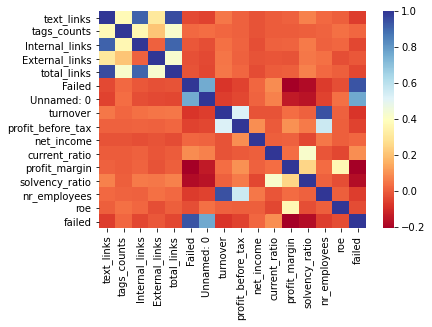

In [153]:


#calcualte correlation
corr_matrix = merged_df.corr()

#discover through the colour
sns.heatmap(corr_matrix, cmap='RdYlBu')

In [154]:
corr_matrix

,text_links,tags_counts,Internal_links,External_links,total_links,Failed,Unnamed: 0,turnover,profit_before_tax,net_income,current_ratio,profit_margin,solvency_ratio,nr_employees,roe,failed
text_links,1.000000,0.375463,0.911794,0.308171,0.952753,-0.035466,-0.050462,0.052282,0.011769,-0.016797,-0.000834,0.010831,0.069432,0.026418,0.003072,-0.061507
tags_counts,0.375463,1.000000,0.366840,0.209771,0.419132,0.022517,0.032381,0.020571,0.009524,-0.018902,0.000176,-0.000246,0.003846,0.016520,0.039531,0.020840
Internal_links,0.911794,0.366840,1.000000,0.011692,0.908705,-0.010824,-0.026021,0.036355,0.014406,-0.026707,0.008684,0.013881,0.056539,0.010477,0.019042,-0.040092
External_links,0.308171,0.209771,0.011692,1.000000,0.428035,-0.021544,-0.038647,0.046535,0.010095,-0.020051,-0.012824,-0.016849,0.052880,0.040656,-0.027948,-0.009120
total_links,0.952753,0.419132,0.908705,0.428035,1.000000,-0.018777,-0.039653,0.052288,0.017244,-0.032524,0.002499,0.005545,0.073212,0.026447,0.005593,-0.040044
Failed,-0.035466,0.022517,-0.010824,-0.021544,-0.018777,1.000000,0.761200,-0.080112,-0.052113,0.018458,0.091187,-0.208828,-0.180818,-0.064099,-0.027655,0.941488
Unnamed: 0,-0.050462,0.032381,-0.026021,-0.038647,-0.039653,0.761200,1.000000,-0.062430,-0.040011,0.014502,0.071282,-0.139614,-0.158974,-0.050824,0.040409,0.767743
turnover,0.052282,0.020571,0.036355,0.046535,0.052288,-0.080112,-0.062430,1.000000,0.523472,-0.016638,-0.018356,0.031964,0.008877,0.946523,0.009114,-0.079909
profit_before_tax,0.011769,0.009524,0.014406,0.010095,0.017244,-0.052113,-0.040011,0.523472,1.000000,0.093443,-0.004943,0.100502,0.058033,0.562776,0.007032,-0.050903
net_income,-0.016797,-0.018902,-0.026707,-0.020051,-0.032524,0.018458,0.014502,-0.016638,0.093443,1.000000,0.006615,0.011061,-0.042488,0.053071,0.005629,0.017942


# Feature Selection

corrleation

In [155]:
# finding the features which have more than 0.1 correlation 
numeric_data_corr = merged_df.corr()
high_corr_features = list(numeric_data_corr[(numeric_data_corr['failed'].abs() > 0.1) & (numeric_data_corr['failed'] != 1)].index)

In [156]:
#Solvency ratio is a financial ratio that measures a company's ability to meet its long-term debts

In [157]:
high_corr_features

['Failed', 'Unnamed: 0', 'profit_margin', 'solvency_ratio']

In [158]:
merged_df.dtypes

website               object
text_links             int64
tags_counts            int64
Internal_links         int64
External_links         int64
total_links            int64
Failed                 int64
Unnamed: 0             int64
bvdID                 object
company_name          object
country_iso           object
size                  object
legal_form            object
closing_date          object
turnover             float64
profit_before_tax    float64
net_income           float64
current_ratio        float64
profit_margin        float64
solvency_ratio       float64
nr_employees         float64
roe                  float64
failed                 int64
dtype: object

Encoding

In [159]:
merged_df['legal_form'].value_counts()

Limited liability company - SRL                                   462
Limited liability company - OOO                                   422
Private limited liability company - AB                            148
Limited liability company - SL                                    116
Limited company, simplified - SAS                                  80
One-person company with limited liability - SRLU                   63
Joint stock company - SPA                                          57
One-person company with limited liability - SLU                    41
Private limited company - OY                                       39
Limited liability company - SARL                                   34
Joint stock company                                                33
Limited company by shares - SA/NV                                  26
Closed joint stock company - ZAO                                   24
Sole corporation                                                   22
Limited company by s

In [195]:
# Initialize label encoder
le = LabelEncoder()

# Fit and transform the legal_form column using label encoder
merged_df['legal_form_encoded'] = le.fit_transform(merged_df['legal_form'])
merged_df['size_encoded'] = le.fit_transform(merged_df['size'])
merged_df['country_encoded'] =le.fit_transform(merged_df['country_iso'])

<ipython-input-195-1edf75f7bcf3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['legal_form_encoded'] = le.fit_transform(merged_df['legal_form'])
<ipython-input-195-1edf75f7bcf3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['size_encoded'] = le.fit_transform(merged_df['size'])
<ipython-input-195-1edf75f7bcf3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [161]:
merged_df['legal_form_encoded'].value_counts()

26    462
23    422
44    148
25    116
21     80
37     63
14     57
36     41
42     39
24     34
11     33
19     26
0      24
53     22
18     22
39     21
7      20
46     18
27     17
34     15
45     14
17     12
16     10
38      9
35      9
6       6
40      4
51      3
33      3
48      3
15      2
13      2
12      2
54      2
10      2
52      2
4       2
20      2
49      2
29      2
30      2
31      2
41      2
1       1
5       1
8       1
3       1
2       1
56      1
9       1
22      1
55      1
32      1
43      1
47      1
50      1
28      1
Name: legal_form_encoded, dtype: int64

In [196]:
merged_df['size_encoded'].value_counts()

1    1299
0     419
3      67
2       8
Name: size_encoded, dtype: int64

In [208]:
feature_rd = merged_df.drop(columns=['Unnamed: 0','bvdID','company_name','website','country_iso','closing_date','legal_form','size','Failed','country_iso','text_links','tags_counts'])

In [209]:
feature_rd.dtypes

Internal_links          int64
External_links          int64
total_links             int64
turnover              float64
profit_before_tax     float64
net_income            float64
current_ratio         float64
profit_margin         float64
solvency_ratio        float64
nr_employees          float64
roe                   float64
failed                  int64
legal_form_encoded      int32
size_encoded            int32
country_encoded         int32
dtype: object

In [201]:
feature_rd = feature_rd.dropna()

In [202]:
org_rd = feature_rd.drop(columns=['text_links','tags_counts','Internal_links','External_links','total_links'])

In [203]:
org_rd.dtypes

turnover              float64
profit_before_tax     float64
net_income            float64
current_ratio         float64
profit_margin         float64
solvency_ratio        float64
nr_employees          float64
roe                   float64
failed                  int64
legal_form_encoded      int32
size_encoded            int32
country_encoded         int32
dtype: object

In [204]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(org_rd.drop('failed', axis=1), org_rd['failed'], test_size=0.25, random_state=33)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(feature_rd.drop('failed', axis=1), feature_rd['failed'], test_size=0.25, random_state=33)

In [188]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

# Make predictions using the best model found by GridSearchCV
y_pred = grid_search.predict(X_test)

# Print the accuracy score and classification report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  3.8min finished
C:\Users\NuclearSnail\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBC

Best hyperparameters:  {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.9}
Accuracy:  0.7808219178082192
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       224
           1       0.79      0.76      0.77       214

    accuracy                           0.78       438
   macro avg       0.78      0.78      0.78       438
weighted avg       0.78      0.78      0.78       438



In [211]:

# Create XGBClassifier with the best hyperparameters
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    gamma=0.2,
    learning_rate=0.1,
    max_depth=4,
    min_child_weight=1,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss')

# Train the model on the full training dataset
xgb_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7884187082405345
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       227
           1       0.80      0.77      0.78       222

    accuracy                           0.79       449
   macro avg       0.79      0.79      0.79       449
weighted avg       0.79      0.79      0.79       449



In [212]:

# Create XGBClassifier with the best hyperparameters
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    gamma=0.2,
    learning_rate=0.1,
    max_depth=4,
    min_child_weight=1,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss')

# Train the model on the full training dataset
xgb_model.fit(X_train_1, y_train_1)

# Make predictions on the test dataset
y_pred = xgb_model.predict(X_test_1)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test_1, y_pred))
print(classification_report(y_test_1, y_pred))

Accuracy: 0.769406392694064
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       224
           1       0.77      0.75      0.76       214

    accuracy                           0.77       438
   macro avg       0.77      0.77      0.77       438
weighted avg       0.77      0.77      0.77       438



In [207]:
y_pred = model.predict(dtest)
y_pred_class = [round(pred) for pred in y_pred]
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy:', accuracy_score(y_test_1, y_pred_class))
print(classification_report(y_test_1, y_pred_class))

Accuracy: 0.7625570776255708
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       224
           1       0.76      0.75      0.75       214

    accuracy                           0.76       438
   macro avg       0.76      0.76      0.76       438
weighted avg       0.76      0.76      0.76       438



In [172]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_round = 100
model = xgb.train(params, dtrain, num_round)

In [173]:
y_pred = model.predict(dtest)
y_pred_class = [round(pred) for pred in y_pred]
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy:', accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

Accuracy: 0.7625570776255708
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       224
           1       0.76      0.75      0.75       214

    accuracy                           0.76       438
   macro avg       0.76      0.76      0.76       438
weighted avg       0.76      0.76      0.76       438



In [174]:
from sklearn.metrics import classification_report

# assuming y_true and y_pred are the true and predicted labels, respectively
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       224
           1       0.76      0.75      0.75       214

    accuracy                           0.76       438
   macro avg       0.76      0.76      0.76       438
weighted avg       0.76      0.76      0.76       438



In [175]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report

# # instantiate SVM model
# model = SVC(kernel='linear')

# # fit the model on training data
# model.fit(X_train, y_train)

# # predict on test data
# y_pred = model.predict(X_test)

# # evaluate the model
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [181]:
from sklearn.linear_model import LogisticRegression
# Create the logistic regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6552511415525114
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       224
           1       0.68      0.56      0.61       214

    accuracy                           0.66       438
   macro avg       0.66      0.65      0.65       438
weighted avg       0.66      0.66      0.65       438



C:\Users\NuclearSnail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
# Create the logistic regression model
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train_1, y_train_1)

# Make predictions on the test data
y_pred = lr_model.predict(X_test_1)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test_1, y_pred))
print(classification_report(y_test_1, y_pred))

Accuracy: 0.6575342465753424
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       224
           1       0.65      0.65      0.65       214

    accuracy                           0.66       438
   macro avg       0.66      0.66      0.66       438
weighted avg       0.66      0.66      0.66       438



C:\Users\NuclearSnail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'RandomForestClassifier' is not defined

In [185]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

ModuleNotFoundError: No module named 'tensorflow'

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6689497716894978
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       224
           1       0.67      0.64      0.65       214

    accuracy                           0.67       438
   macro avg       0.67      0.67      0.67       438
weighted avg       0.67      0.67      0.67       438



In [187]:
# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train_1, y_train_1)

# Make predictions on the test data
y_pred = knn.predict(X_test_1)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test_1, y_pred))
print(classification_report(y_test_1, y_pred))

Accuracy: 0.7077625570776256
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       224
           1       0.71      0.68      0.69       214

    accuracy                           0.71       438
   macro avg       0.71      0.71      0.71       438
weighted avg       0.71      0.71      0.71       438



Principal Component Analysis

In [ ]:
# 创建PCA对象，指定要保留的主成分数量
pca = PCA(n_components=2)

# 对数据集进行标准化处理
numeric_data_std = (clean_data - clean_data.mean()) / clean_data.std()

# 训练PCA模型并对数据集进行转换
principal_components = pca.fit_transform(numeric_data_std.drop(['failed'], axis=1))

# 输出新的特征空间中的前5行数据
print(principal_components[:8])

In [ ]:
pca_result = np.array(principal_components)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [ ]:
import os

# Get the current working directory
cwd = os.getcwd()

# Navigate to the file location
file_path = os.path.join(cwd, 'file_name.csv')